In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os
import requests
from datetime import date, timedelta

ticker = "AAPL"
api_key = os.getenv("MASSIVE_API_KEY")

end_date = date.today() - timedelta(days=1)
start_date = end_date - timedelta(days=90)

url = f"https://api.massive.com/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}"

params = {
    "adjusted": "true",
    "sort": "asc",
    "apiKey": api_key
}

resp = requests.get(url, params=params, timeout=30)

print("status:", resp.status_code)
print("text head:", resp.text[:250])

api_data = resp.json()
print("keys:", list(api_data.keys()))


status: 200
text head: {"ticker":"AAPL","queryCount":63,"resultsCount":63,"adjusted":true,"results":[{"v":4.6076258e+07,"vw":255.458,"o":254.095,"c":255.46,"h":257.6,"l":253.78,"t":1758859200000,"n":550704},{"v":4.0127687e+07,"vw":254.0231,"o":254.56,"c":254.43,"h":255,"l"
keys: ['ticker', 'queryCount', 'resultsCount', 'adjusted', 'results', 'status', 'request_id', 'count']


In [6]:
results = api_data.get("results", [])
print("results len:", len(results))

apple_df = pd.DataFrame(results)
apple_df.head()

results len: 63


,v,vw,o,c,h,l,t,n
0,46076258.0,255.4580,254.095,255.46,257.600,253.78,1758859200000,550704
1,40127687.0,254.0231,254.560,254.43,255.000,253.01,1759118400000,489835
2,37704259.0,254.5390,254.855,254.63,255.919,253.11,1759204800000,439294
3,48713940.0,256.0040,255.040,255.45,258.790,254.93,1759291200000,535581
4,42630239.0,256.8550,256.575,257.13,258.180,254.15,1759377600000,485229


In [7]:
apple_df["date"] = pd.to_datetime(apple_df["t"], unit="ms")
apple_df = apple_df.set_index("date").sort_index()
apple_df.head()

,v,vw,o,c,h,l,t,n
date,,,,,,,,
2025-09-26 04:00:00,46076258.0,255.4580,254.095,255.46,257.600,253.78,1758859200000,550704
2025-09-29 04:00:00,40127687.0,254.0231,254.560,254.43,255.000,253.01,1759118400000,489835
2025-09-30 04:00:00,37704259.0,254.5390,254.855,254.63,255.919,253.11,1759204800000,439294
2025-10-01 04:00:00,48713940.0,256.0040,255.040,255.45,258.790,254.93,1759291200000,535581
2025-10-02 04:00:00,42630239.0,256.8550,256.575,257.13,258.180,254.15,1759377600000,485229


In [8]:
apple_df = apple_df.rename(columns={
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low"
})
apple_df[["open","close","high","low"]].head()

,open,close,high,low
date,,,,
2025-09-26 04:00:00,254.095,255.46,257.600,253.78
2025-09-29 04:00:00,254.560,254.43,255.000,253.01
2025-09-30 04:00:00,254.855,254.63,255.919,253.11
2025-10-01 04:00:00,255.040,255.45,258.790,254.93
2025-10-02 04:00:00,256.575,257.13,258.180,254.15


<Axes: xlabel='date'>

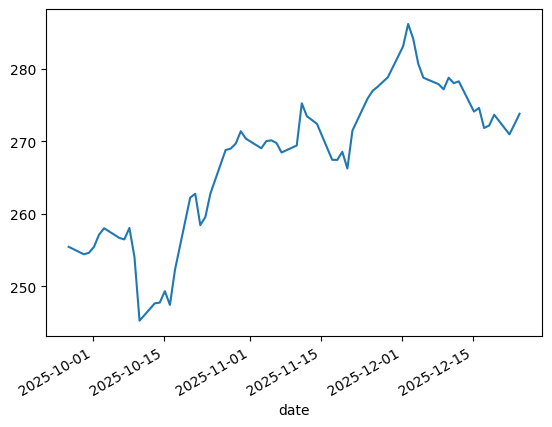

In [11]:
apple_df['close'].plot()

<Axes: xlabel='date'>

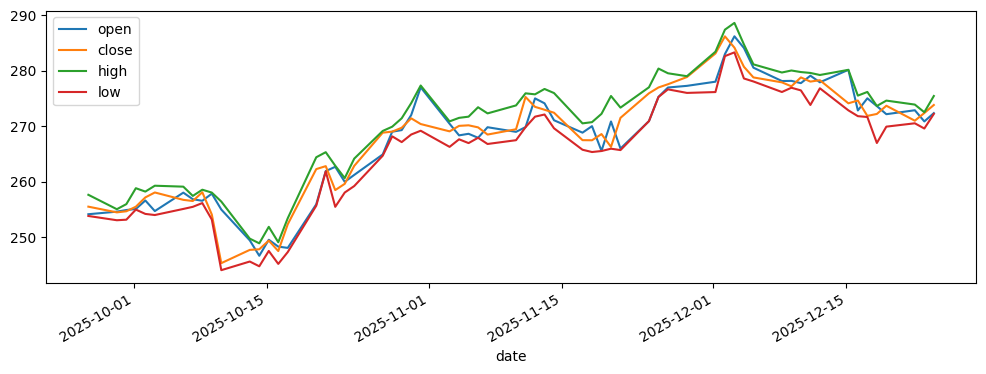

In [12]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())